## Fees research
Based on DAI CDP protocol

There are two types of fees in DAI protocol
- Liquidation
- Borrow fee

We are interested in Borrow Fee(also called Variable Annual Fee).

A fundamental feature of the MCD system is to accumulate stability fees on Vault debt balances.

Example of how fee works:
> Stability Fee is set to 2%, it will accumulate at 0.000000000627937192491029810% per second. At the end of year one, the user will owe exactly 2% on the principal.

Assuming the user borrows 100 Dai and the rate doesn’t change, at the end of year one they would have a debt of 102.00 Dai. At the end of year two, they would have a debt of 104.04 Dai.

### Key points about borrow fees:
- Fees accrue over a year
- Different protocols(ETH-C, ETH-B, ETH-A, ...) have different stability fees based on collateral ratio, that is based on risk exposure. For example, for collateral 170.00% fee is 0.5%, while for collateral of 145.00% fee is larger - 1.5%

## Multiply feature(Leverage)

Oasis Multiply is a feature that allows you to immediately utilize your borrowed Dai to buy more collateral within Oasis.app. This means that you can increase or decrease your exposure to a single asset without having to perform multiple transactions or go to other apps to perform the exchange.

It sounds like a two-way borrow market


## Now, let's first model the case for plain borrowing with variable fees ANUALLY

In [17]:
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display_functions import display
from IPython.display import HTML
from matplotlib.lines import Line2D

from notebooks.ebtc_research.generate_data import DAI_FEES
from notebooks.ebtc_research.generate_data import DAI_MULTIPLY_FEES_PAIRS
from notebooks.ebtc_research.generate_data import get_tables_dai_like
from notebooks.ebtc_research.generate_data import get_tables_dai_like_multiply

plt.style.use('seaborn')
pd.set_option('display.max_rows', 500)
TABLE_HEADERS = ["Volume in $", "Projected Yearly Revenue in $", "Borrow Fee"]
tables = get_tables_dai_like()
df = pd.DataFrame(data=[*tables], columns=TABLE_HEADERS)
display(HTML(df.to_html(index=False)))

Volume in $,Projected Yearly Revenue in $,Borrow Fee
1000000.0000,5000.0,0.005
1000000.0000,15000.0,0.015
1000000.0000,30000.0,0.03
-,-,-
2000000.0000,10000.0,0.005
2000000.0000,30000.0,0.015
2000000.0000,60000.0,0.03
-,-,-
3000000.0000,15000.0,0.005
3000000.0000,45000.0,0.015


## Visualization for variable borrow fee, no leverage ANUALLY

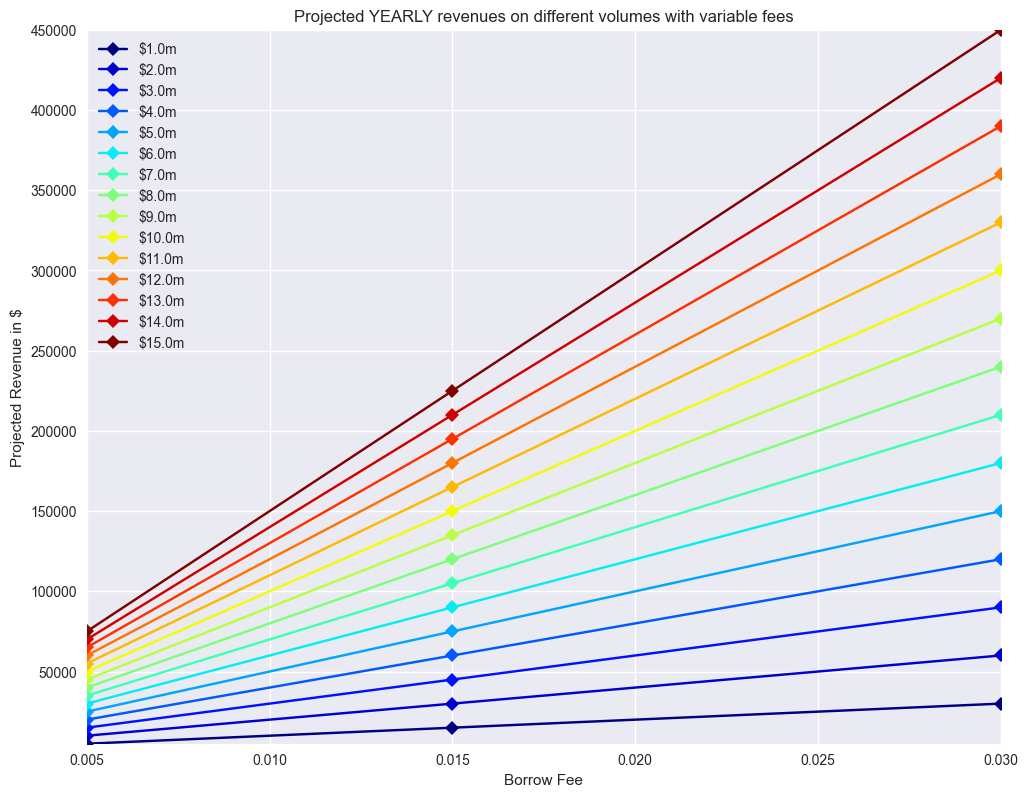

In [18]:
# Remove empty rows
df.drop(df.loc[df['Borrow Fee'] == "-"].index, inplace=True)
volumes_set = set([table[0] for table in tables if table[0] != "-"])
volumes_list = list(volumes_set)
volumes_list = sorted(volumes_list, key=lambda v: float(v))
revenues = [table[1] for table in tables if table[0] != "-"]
fig, ax = plt.subplots()
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(10)
colors = pl.cm.jet(np.linspace(0, 1, len(volumes_list)))
for index, volume in enumerate(volumes_list):
    df_located = df.loc[df['Volume in $'] == volume]

    line = Line2D(
        df_located['Borrow Fee'].tolist(), df_located['Projected Yearly Revenue in $'].tolist(), c=colors[index], marker="D", rasterized=True
    )
    ax.add_line(line)
    line.set_label(f"${float(volume) / 1000000}m")

ax.legend()
ax.set_title('Projected YEARLY revenues on different volumes with variable fees')
ax.set_ylabel('Projected Revenue in $')
ax.set_xlabel('Borrow Fee')
ax.set_xlim(min(DAI_FEES), max(DAI_FEES))
ax.set_ylim(min(revenues), max(revenues))
plt.show()


## Next, modelling multiply feature, which is basically leverage
You borrow DAI and then increase your ETH exposure with different leverages, like 4.33x or 3.22x
Each leverage has different borrow fee, starting from 3% for 4.33x and going down

> Note! As you can see from plot below, revenue on Leverage grows non-linearly, because the bigger the leverage - the bigger the fee

In [19]:
TABLE_HEADERS_MULTIPLY = ["Volume in $", "Projected Yearly Revenue in $", "Borrow Fee", "Multiply(Leverage)"]
tables_multiply = get_tables_dai_like_multiply()
df = pd.DataFrame(data=[*tables_multiply], columns=TABLE_HEADERS_MULTIPLY)
display(HTML(df.to_html(index=False)))

Volume in $,Projected Yearly Revenue in $,Borrow Fee,Multiply(Leverage)
1000000.0000,129900.0,0.03,4.33
1000000.0000,48300.0,0.015,3.22
1000000.0000,12100.0,0.005,2.42
-,-,-,-
2000000.0000,259800.0,0.03,4.33
2000000.0000,96600.0,0.015,3.22
2000000.0000,24200.0,0.005,2.42
-,-,-,-
3000000.0000,389700.0,0.03,4.33
3000000.0000,144900.0,0.015,3.22


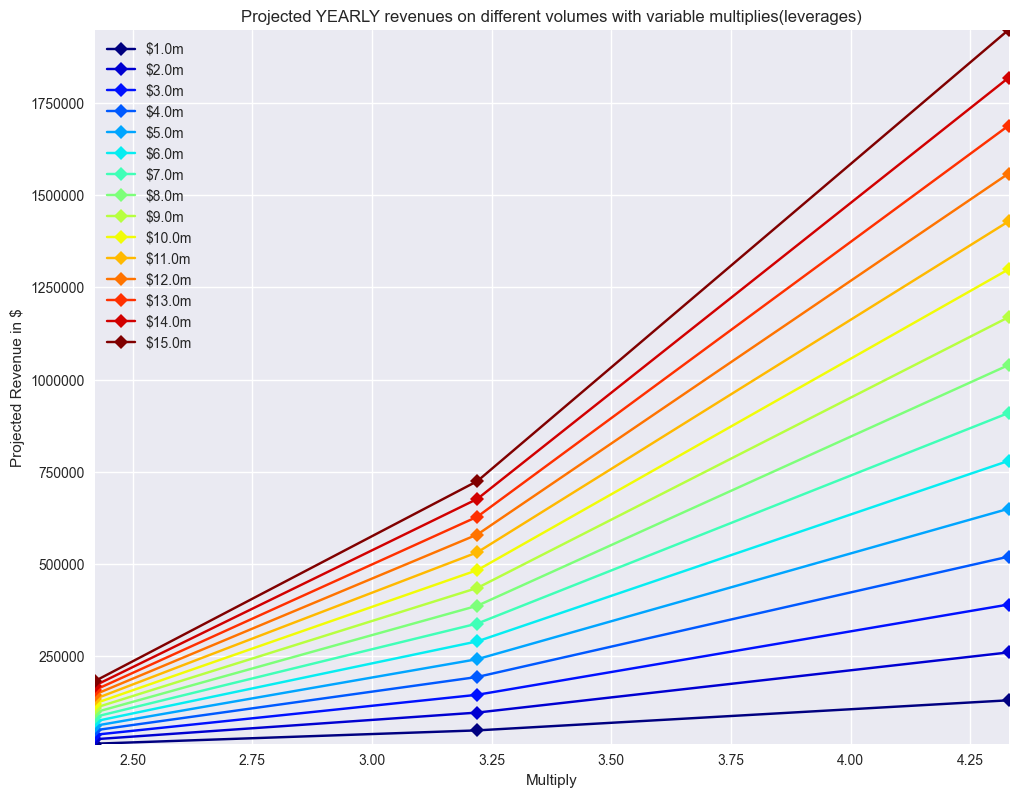

In [20]:
df.drop(df.loc[df['Borrow Fee'] == "-"].index, inplace=True)
volumes_set = set([table[0] for table in tables_multiply if table[0] != "-"])
volumes_list = list(volumes_set)
volumes_list = sorted(volumes_list, key=lambda v: float(v))
revenues = [table[1] for table in tables_multiply if table[1] != "-"]
dai_multiplies = [pair[0] for pair in DAI_MULTIPLY_FEES_PAIRS]
fig, ax = plt.subplots()
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(10)
colors = pl.cm.jet(np.linspace(0, 1, len(volumes_list)))
for index, volume in enumerate(volumes_list):
    df_located = df.loc[df['Volume in $'] == volume]

    line = Line2D(
        df_located['Multiply(Leverage)'].tolist(), df_located['Projected Yearly Revenue in $'].tolist(), c=colors[index], marker="D", rasterized=True
    )
    ax.add_line(line)
    line.set_label(f"${float(volume) / 1000000}m")

ax.legend()
ax.set_title('Projected YEARLY revenues on different volumes with variable multiplies(leverages)')
ax.set_ylabel('Projected Revenue in $')
ax.set_xlabel('Multiply')
ax.ticklabel_format(style='plain')
ax.set_xlim(min(dai_multiplies), max(dai_multiplies))
ax.set_ylim(min(revenues), max(revenues))
plt.show()